## Indicador Socioeconomico (Inse)

>No entanto, parece haver consenso na literatura (Buchmann, 2002; Sirin, 2005; Alves; Soares; Xavier, 2014; Broer; Bai; Fonseca, 2019) que os três componentes principais de um indicador socioeconômico são: renda familiar, nível educacional dos pais e ocupação dos pais.

-Nota Tecnica de 2021.

>Toda amostra extraída de uma população finita requer que seus dados sejam adequadamente ponderados para permitir estimar medidas de interesse referentes ao conjunto da população. Isso se torna mais visível quando se trata de estimar totais populacionais, mas não é menos verdadeiro quando se pretende estimar outras quantidades, tais como médias e proporções.

-Nota Tecnica de 2021.

Ao que entendi, posso então considerar apenas os estudantes na qual foi dado um peso, pois eles já fizeram o trabalho de validar consistencia e outras propriedades estatisticas na qual eu não vou entender por agora.

Recomendo utilizar o dicionario salvo no Google sheets para se informar quais são os campos/dados disponiveis no CSV.

In [25]:
import pandas as pd
import statsmodels.api as sm #Para a tabela de contingencia.
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns #Emfaze em graficos para estatistica.
import scipy.stats as stats
sns.set_theme() 

In [5]:
with open("TS_ALUNO_34EM.csv", "r") as f:
    total_rows = sum(1 for _ in f) - 1  # subtract 1 for header

In [6]:
row_skips = np.random.choice(range(1, total_rows+1), size = total_rows - 1500, replace = False)

In [8]:
df_quanti = pd.read_csv("TS_ALUNO_34EM.csv", sep=';', nrows=1500,  usecols = 
                 ['TX_RESP_Q01', 
                  'PROFICIENCIA_LP_SAEB', 
                  'PROFICIENCIA_MT_SAEB'], 
                 skiprows=row_skips)

df_quali = pd.read_csv("TS_ALUNO_34EM.csv", sep=';', nrows=1500,  usecols = 
                 ['TX_RESP_Q23a',
                  'TX_RESP_Q23b',
                  'TX_RESP_Q19'], 
                 skiprows=row_skips)

In [9]:
df_quanti.head()

,PROFICIENCIA_LP_SAEB,PROFICIENCIA_MT_SAEB,TX_RESP_Q01
0,283.280003,296.163917,B
1,280.085910,264.212956,B
2,273.249044,331.553151,B
3,282.648688,337.878038,A
4,NaN,NaN,.


# Limpando os dados.

In [10]:
df_quanti.columns = ['PROEF_LP', 'PROEF_MT', 'SEXO']

In [17]:
#Assumindo que .dropna também vai dropar os valores que o sexo não foi atribuido.
#Acho que então isso limita a analise para somente estudantes que são cisgenero.
df_quanti.dropna(axis=0, how='any', inplace=True, ignore_index=True)
df_quanti = df_quanti[df_quanti['SEXO'].isin(['A','B'])]

In [19]:
df_quanti.replace(to_replace={'A':'Masc', 'B': 'Fem'}, inplace=True)

In [21]:
df_quanti.head(10)

,PROEF_LP,PROEF_MT,SEXO
0,283.280003,296.163917,Fem
1,280.085910,264.212956,Fem
2,273.249044,331.553151,Fem
3,282.648688,337.878038,Masc
4,239.925934,263.894873,Masc
5,403.168119,342.138096,Masc
6,293.393601,321.329326,Masc
7,228.710082,238.906140,Masc
8,308.407039,305.353622,Masc
10,207.442997,192.573300,Fem


## Boxplots 

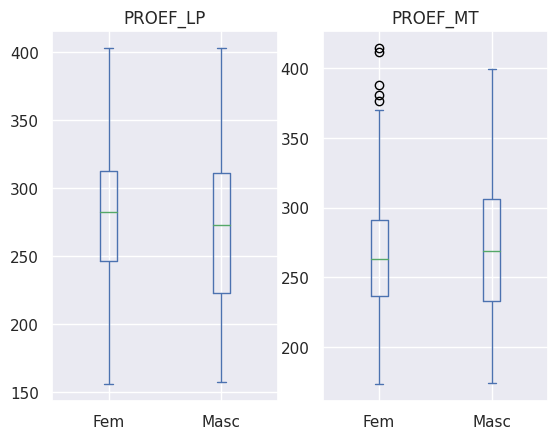

In [104]:
df_quanti.plot.box(by='SEXO')
plt.show()

## Grafico de dispersão para a proeficiencia em matematica e proeficiencia em portugues.

O grafico de dispersão neste caso motivou o uso da estatistica de spearman para medir a associação entre as variaveis.

Disso podemos formular as seguintes hipoteses nulas e hipoteses alternativas:
- H0: As variaves tem associação igual a 0.
- H1: As variaveis tem associação diferente de 0.

<Axes: xlabel='PROEF_LP', ylabel='PROEF_MT'>

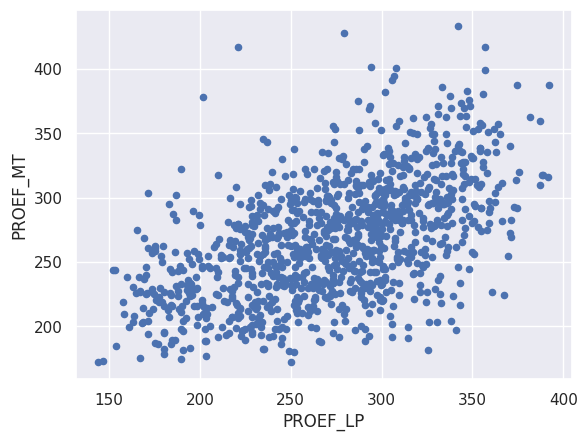

In [46]:
df_quanti.plot.scatter('PROEF_LP', 'PROEF_MT')

In [88]:
statistic, p = stats.spearmanr(df_quanti['PROEF_LP'], df_quanti['PROEF_MT'])

if p < 0.05:
    print(f'Como o p-valor é {p}, rejeitamos a hipotese nula.')
    print(f'Temos uma estatistica (Spearman) de {statistic}')
else:
    print(f'Como o p-valor é {p}, não rejeitamos a hipotese nula.')
    print(f'Não existe associação entre essas variaveis.')

Como o p-valor é 3.766229687025082e-82, rejeitamos a hipotese nula.
Temos uma estatistica (Spearman) de 0.5461705887102423


matplotlib.figure.Figure

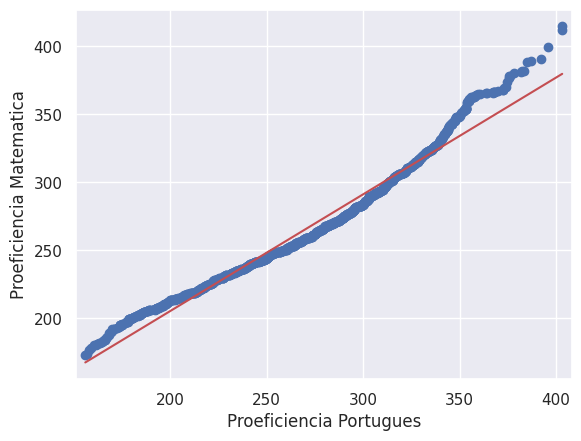

In [117]:
fig1 = sm.qqplot_2samples(data1=df_quanti['PROEF_LP'], data2=df_quanti['PROEF_MT'], xlabel="Proeficiencia Portugues", 
                   ylabel= "Proeficiencia Matematica" ,line='r')
type(fig1)

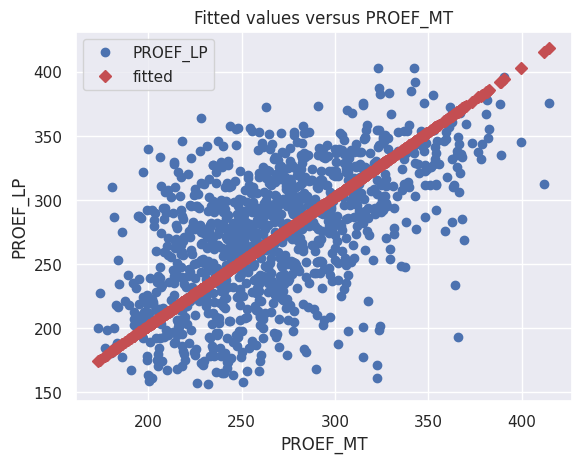

matplotlib.figure.Figure

In [115]:
model_fit = sm.OLS(df_quanti['PROEF_LP'], df_quanti['PROEF_MT']).fit()
fig2= sm.graphics.plot_fit(model_fit, 0, vlines=False) 
plt.show()


Alternativamente eu poderia simplesmente pegar e fazer
```py
x_range = np.linspace(df_quanti['PROEF_LP'].min(), df_quanti['PROEF_LP'].max(), 25)
y_pred = model_fit.predict(x_range)

fig, ax = plt.subplots(1,1)

ax.scatter(df_quanti['PROEF_LP'], df_quanti['PROEF_MT'])
ax.plot(x_range, y_pred, 'r-')

plt.show()
```
Este também funciona da mesma forma. Porem eu acredito que se eu usei o statsmodels
para gerar o modelo, e tem uma função para lidar com plotagem do modelo, então eu devo
usar essa função inves de ficar reinventando a roda.

>“É observado que estudantes que tem maior proeficiencia em matematica também tendem a ter maior proeficiencia em portugues. A relação não é perfeita, mas existe uma tendencia clara—dá para notar isso pelos graficos e o coeficiente de correlação (Pearson) de 0.583.”

# Analise dos dados qualitativos.

### Objetivos

Aqui temos uma analise dos dados da frequencia de reprovação dos estudantes e a motivação deles para estudar.

### Metodos

Os campos de interesse são TX_RESP_Q19, TX_RESP_Q23a e TX_RESP_Q23b que se referem respectivamente a "Você já foi reprovado ?", "Me interesso pelo que foi ensinado esse ano" e "Me sinto motivado a usar o que foi ensinado esse ano". 

Eu espero ver que estudantes que tenham reprovado sejam aqueles menos interessados.

Para isso usei a estatistica $\chi^2$ na tabela de contigencia dos dados sobre a hipotese nula de que as respostas de TX_RESP_Q23a e TX_RESP_Q23b são independentes das respostas de TX_RESP_Q19.

### Resultados

O teste qui-quadrado resultou em $p \approx 0.99$

### Discussão dos Resultados

Apesar da hipótese inicial sugerir que estudantes com histórico de reprovação demonstrariam menor motivação ou interesse nas aulas, a análise estatística contradiz essa expectativa.

- O teste qui-quadrado resultou em \( p \approx 0.99 \), indicando ausência total de associação.
- O coeficiente de contingência calculado foi **0.04**, o que reforça a fraca dependência entre as variáveis.
- A distribuição condicional entre categorias no heatmap reforça essa conclusão visualmente.

In [95]:
df_quali.replace('.', pd.NA, inplace=True)
df_quali.dropna(axis=0, how='any', inplace=True)

map_q19 = {
    'A': 'Nunca reprovou',
    'B': 'Já reprovou 1 vez',
    'C': 'Já reprovou 2+ vezes'
}

map_q23a = {
    'A': 'Concordo totalmente',
    'B': 'Concordo',
    'C': 'Discordo',
    'D': 'Discordo totalmente'
}

map_q23b = map_q23a.copy()  # Usando o fato que temos a mesma escala Likert.

colunas = ['TX_RESP_Q19', 'TX_RESP_Q23a', 'TX_RESP_Q23b']

# O mesmo truque que fiz pra df_quanti na parte de sexo.
df_quali[colunas] = df_quali[colunas].replace({
    'TX_RESP_Q19': map_q19,
    'TX_RESP_Q23a': map_q23a,
    'TX_RESP_Q23b': map_q23b
})

# Definindo uma escala de acordo com o dicionario do SAEB.
# No caso este vai ser usado para Q23a e Q23b.
ordem_likert = map_q23a.values()

ordem_reprovacao = map_q19.values()

#No caso... de acordo com a documentação do pandas, as categorias são em ordem crescente.
#Neste caso o primeiro item é o menor e o ultimo é o maior.
df_quali['TX_RESP_Q23a'] = pd.Categorical(df_quali['TX_RESP_Q23a'], categories=ordem_likert, ordered=False)
df_quali['TX_RESP_Q23b'] = pd.Categorical(df_quali['TX_RESP_Q23b'], categories=ordem_likert, ordered=False)
df_quali['TX_RESP_Q19'] = pd.Categorical(df_quali['TX_RESP_Q19'], categories=ordem_reprovacao, ordered=True)

tabela1 = pd.crosstab(df_quali['TX_RESP_Q19'], df_quali['TX_RESP_Q23a'], normalize='index')
tabela2 = pd.crosstab(df_quali['TX_RESP_Q19'], df_quali['TX_RESP_Q23b'], normalize='index')

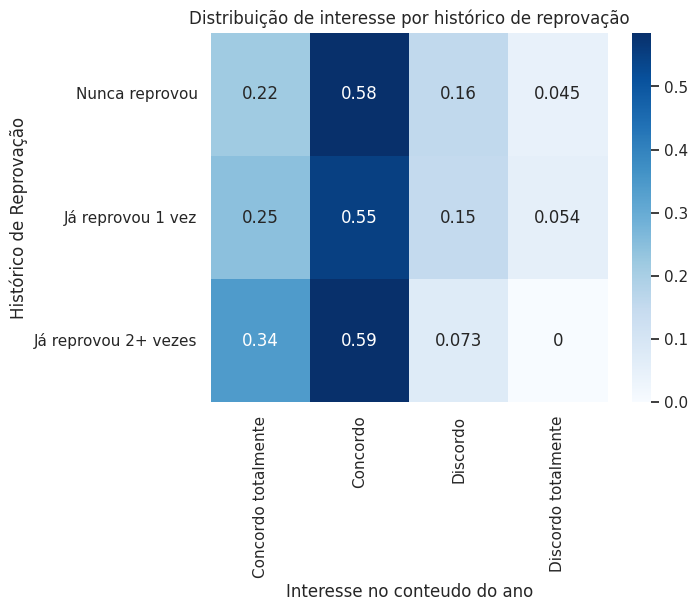

In [97]:
sns.heatmap(tabela1, annot=True, cmap='Blues')
plt.title('Distribuição de interesse por histórico de reprovação')
plt.ylabel('Histórico de Reprovação')
plt.xlabel('Interesse no conteudo do ano')
plt.show()

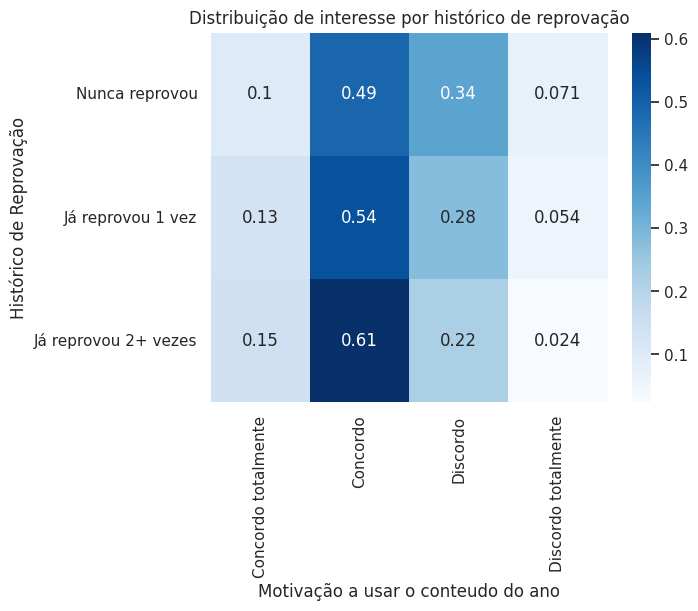

In [99]:
sns.heatmap(tabela2, annot=True, cmap='Blues')
plt.title('Distribuição de interesse por histórico de reprovação')
plt.ylabel('Histórico de Reprovação')
plt.xlabel('Motivação a usar o conteudo do ano')
plt.show()

Valor-p: 0.9999671104658139


<Axes: >

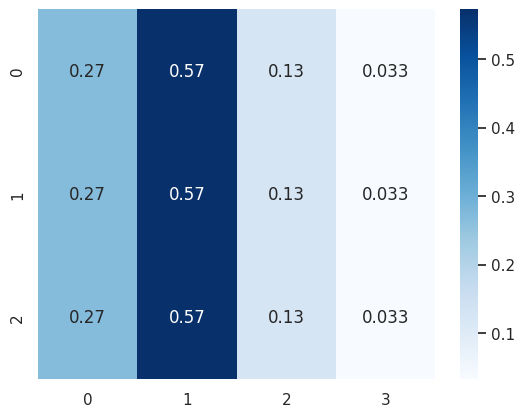

In [101]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabela1)
print(f'Valor-p: {p}')

sns.heatmap(expected, annot=True, cmap='Blues')

In [63]:
print(f'chi-quadrado: {chi2} \nCoef. Contigencia:{np.sqrt(chi2/(chi2 + tabela1.to_numpy().sum()))} \nphi-Coef: {np.sqrt(chi2/tabela1.to_numpy().sum())}')

chi-quadrado: 0.14918222636515205 
Coef. Contigencia:0.2176504885121683 
phi-Coef: 0.22299643223241045
